# Assignment - Using the latest data, find out the best pinch hitters inside PP in the IPL so far (min of 20 ings)

In [39]:
import math
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
deliveries = pd.read_csv('deliveries_updated_mens_ipl.csv')
matches = pd.read_csv('matches_updated_mens_ipl.csv')

In [3]:
deliveries.head(2)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
matches.head(2)

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId
0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591
1,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,Mumbai Indians,NaN,6,SPD Smith,NaN,NaN,Maharashtra Cricket Association Stadium,NaN,field,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1082592


# Player Stats

In [5]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 

def playerStatistics(df):
    
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman', 'matchId'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
    balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
    
    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    
    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    
    return df

In [6]:
df = playerStatistics(deliveries)

In [7]:
df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,12.173913,13.066667,6.322581
1,A Badoni,11,161,139,9,57,53,11,0,11,7,115.827338,14.636364,15.444444,7.722222
2,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
3,A Chopra,6,53,75,5,45,21,2,0,7,0,70.666667,8.833333,15.000000,10.714286
4,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000


# Player Performance in different phases of Match

In [8]:
def phase(over):
    if over <= 5:
        return 'Powerplay'
    elif over <= 14:
        return 'Middle'
    else:
        return 'Death'

In [9]:
deliveries['phase'] = deliveries['over'].apply(lambda x: phase(x))

In [10]:
deliveries.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,phase
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,Powerplay
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay


In [11]:
def phasesOfplay(df, current_phase):
    
    df = df[df.phase == current_phase]
    df.reset_index(inplace = True, drop = True)
    
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman', 'matchId'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
    balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
    
    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    
    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    
    return df

In [12]:
pp_df = phasesOfplay(deliveries, 'Powerplay')
mid_df = phasesOfplay(deliveries, 'Middle')
dth_df = phasesOfplay(deliveries, 'Death')

In [13]:
pp_df.head(2)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,1,5,7,1,5,1,0,0,1,0,71.428571,5.0,7.0,7.0
1,A Badoni,2,1,7,1,6,1,0,0,0,0,14.285714,0.5,7.0,7.0


In [14]:
mid_df.head(2)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,5,61,41,0,16,13,5,0,2,5,148.780488,12.200000,41.000000,5.857143
1,A Badoni,6,59,59,3,24,25,4,0,5,1,100.000000,9.833333,19.666667,9.833333


In [15]:
dth_df.head(2)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,22,214,148,14,40,69,15,1,13,10,144.594595,9.727273,10.571429,6.434783
1,A Badoni,7,101,73,5,27,27,7,0,6,6,138.356164,14.428571,14.600000,6.083333


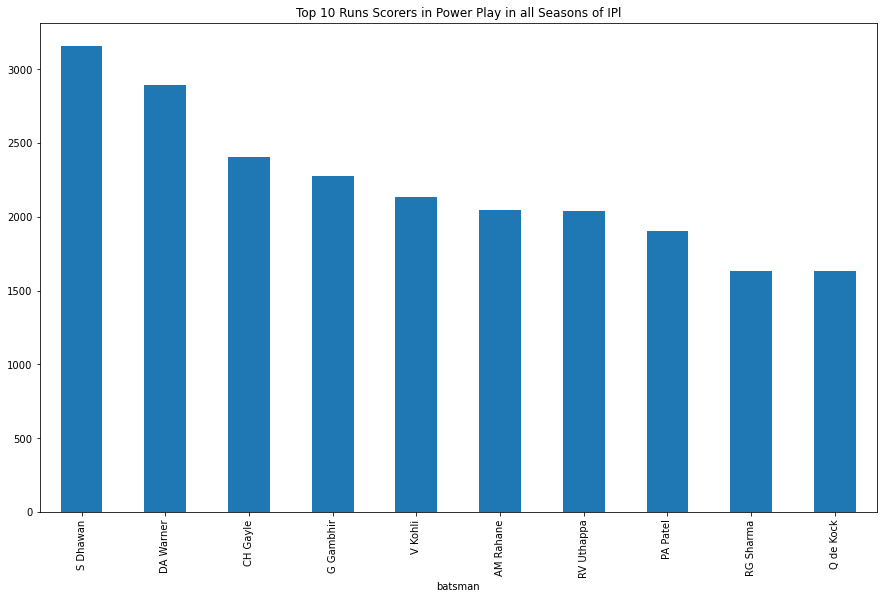

In [16]:
plt.figure(figsize = (15, 9))
pp_df.groupby(['batsman'])['runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 Runs Scorers in Power Play in all Seasons of IPl')
plt.show()

- SR = Strike Rate
- RPI = Runs per Innings
- BPB = Balls per Boundaries
- BPD = Balls per Dismissals

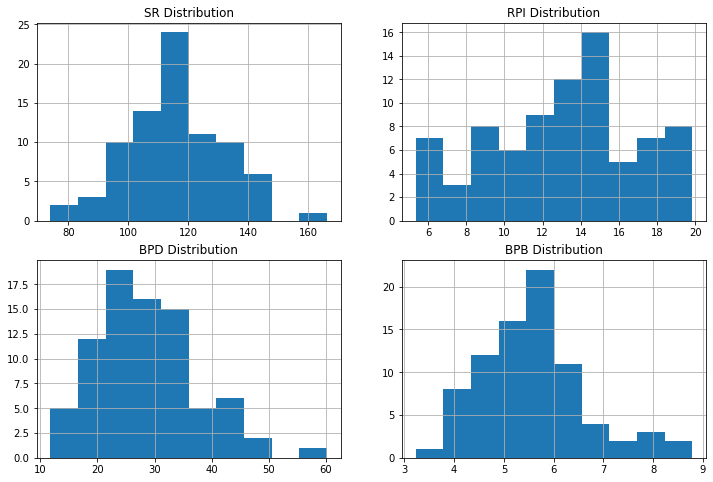

In [42]:
plt.figure(figsize = (12, 8))

plt.subplot(221)
pp_df.SR.hist()
plt.title('SR Distribution')

plt.subplot(222)
pp_df.RPI.hist()
plt.title('RPI Distribution')

plt.subplot(223)
pp_df.BPD.hist()
plt.title('BPD Distribution')

plt.subplot(224)
pp_df.BPB.hist()
plt.title('BPB Distribution')

plt.show()

# MCDM

## Pair wise comparision matrices using Saaty scale & then arriving at weights for each parameter

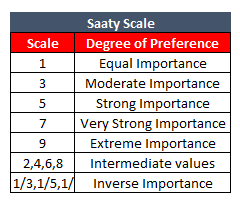

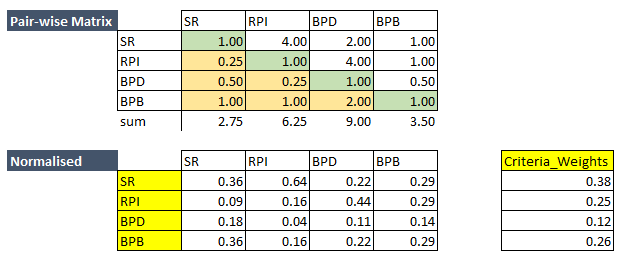

In [18]:
wt_sr, wt_rpi, wt_bpd, wt_bpb = 0.38, 0.25, 0.12, 0.26

###  Filter by 20 innings

In [20]:
pp_df = pp_df[pp_df.innings >= 20]
pp_df.reset_index(inplace = True, drop = True)

## TOPIS Method

## Calculation - Normalizing all values to same dimensions

In [21]:
#step1: square of all values
pp_df['calc_SR'] = pp_df['SR'].apply(lambda x: x*x) 
pp_df['calc_RPI'] = pp_df['RPI'].apply(lambda x: x*x) 
pp_df['calc_BPD'] = pp_df['BPD'].apply(lambda x: x*x) 
pp_df['calc_BPB'] = pp_df['BPB'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_bpb = np.sqrt(pp_df[['calc_SR','calc_RPI', 'calc_BPD', 'calc_BPB']].sum(axis = 0))

pp_df['calc_SR'] = pp_df['calc_SR'].apply(lambda x: x/sq_sr) 
pp_df['calc_RPI'] = pp_df['calc_RPI'].apply(lambda x: x/sq_rpi) 
pp_df['calc_BPD'] = pp_df['calc_BPD'].apply(lambda x: x/sq_bpd) 
pp_df['calc_BPB'] = pp_df['calc_BPB'].apply(lambda x: x/sq_bpb)

pp_df['calc_SR'] = pp_df['calc_SR'].apply(lambda x: x*wt_sr) 
pp_df['calc_RPI'] = pp_df['calc_RPI'].apply(lambda x: x*wt_rpi) 
pp_df['calc_BPD'] = pp_df['calc_BPD'].apply(lambda x: x*wt_bpd) 
pp_df['calc_BPB'] = pp_df['calc_BPB'].apply(lambda x: x*wt_bpb)

best_sr, worst_sr = max(pp_df['calc_SR']), min(pp_df['calc_SR'])
best_rpi, worst_rpi = max(pp_df['calc_RPI']), min(pp_df['calc_RPI'])
best_bpd, worst_bpd = max(pp_df['calc_BPD']), min(pp_df['calc_BPD'])
best_bpb, worst_bpb = min(pp_df['calc_BPB']), max(pp_df['calc_BPB'])

## Calculation - Comparision against the best & worst values 

In [22]:
pp_df['dev_best_SR'] = pp_df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr)) 
pp_df['dev_best_RPI'] = pp_df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi)) 
pp_df['dev_best_BPD'] = pp_df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd)) 
pp_df['dev_best_BPB'] = pp_df['calc_BPB'].apply(lambda x: (x-best_bpb)*(x-best_bpb))

pp_df['dev_best_sqrt'] = pp_df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_BPB'], axis = 1) 

pp_df['dev_worst_SR'] = pp_df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr)) 
pp_df['dev_worst_RPI'] = pp_df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi)) 
pp_df['dev_worst_BPD'] = pp_df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd)) 
pp_df['dev_worst_BPB'] = pp_df['calc_BPB'].apply(lambda x: (x-worst_bpb)*(x-worst_bpb))

pp_df['dev_worst_sqrt'] = pp_df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_BPB'], axis = 1) 

## Final Step - Overall score for each player ( values from 0 - 1)

In [23]:
pp_df['score'] = pp_df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [24]:
pp_df[['batsman', 'score']].head()

,batsman,score
0,AB de Villiers,0.257104
1,AC Gilchrist,0.467899
2,AJ Finch,0.151491
3,AM Rahane,0.171571
4,AT Rayudu,0.089395


In [25]:
pp_df[[ 'batsman','innings', 'runs', 'balls', 'dismissals', 'fours', 'sixes', 'SR', 'BPB', 'score']].sort_values(['score'], ascending = False).reset_index(drop = True).head(25)

,batsman,innings,runs,balls,dismissals,fours,sixes,SR,BPB,score
0,SP Narine,42,665,400,34,86,38,166.250000,3.225806,0.962398
1,JM Bairstow,36,695,487,16,88,30,142.710472,4.127119,0.779989
2,PP Shaw,63,1129,787,39,155,35,143.456163,4.142105,0.778595
3,CA Lynn,40,779,553,17,99,37,140.867993,4.066176,0.749781
4,E Lewis,22,420,298,13,49,21,140.939597,4.257143,0.737691
5,YK Pathan,33,361,256,12,47,16,141.015625,4.063492,0.728321
6,JC Buttler,62,1230,882,26,157,55,139.455782,4.160377,0.725100
7,RA Tripathi,51,779,566,23,96,29,137.632509,4.528000,0.670107
8,V Sehwag,103,1593,1160,60,230,46,137.327586,4.202899,0.658456
9,SA Yadav,52,727,534,14,105,22,136.142322,4.204724,0.656796


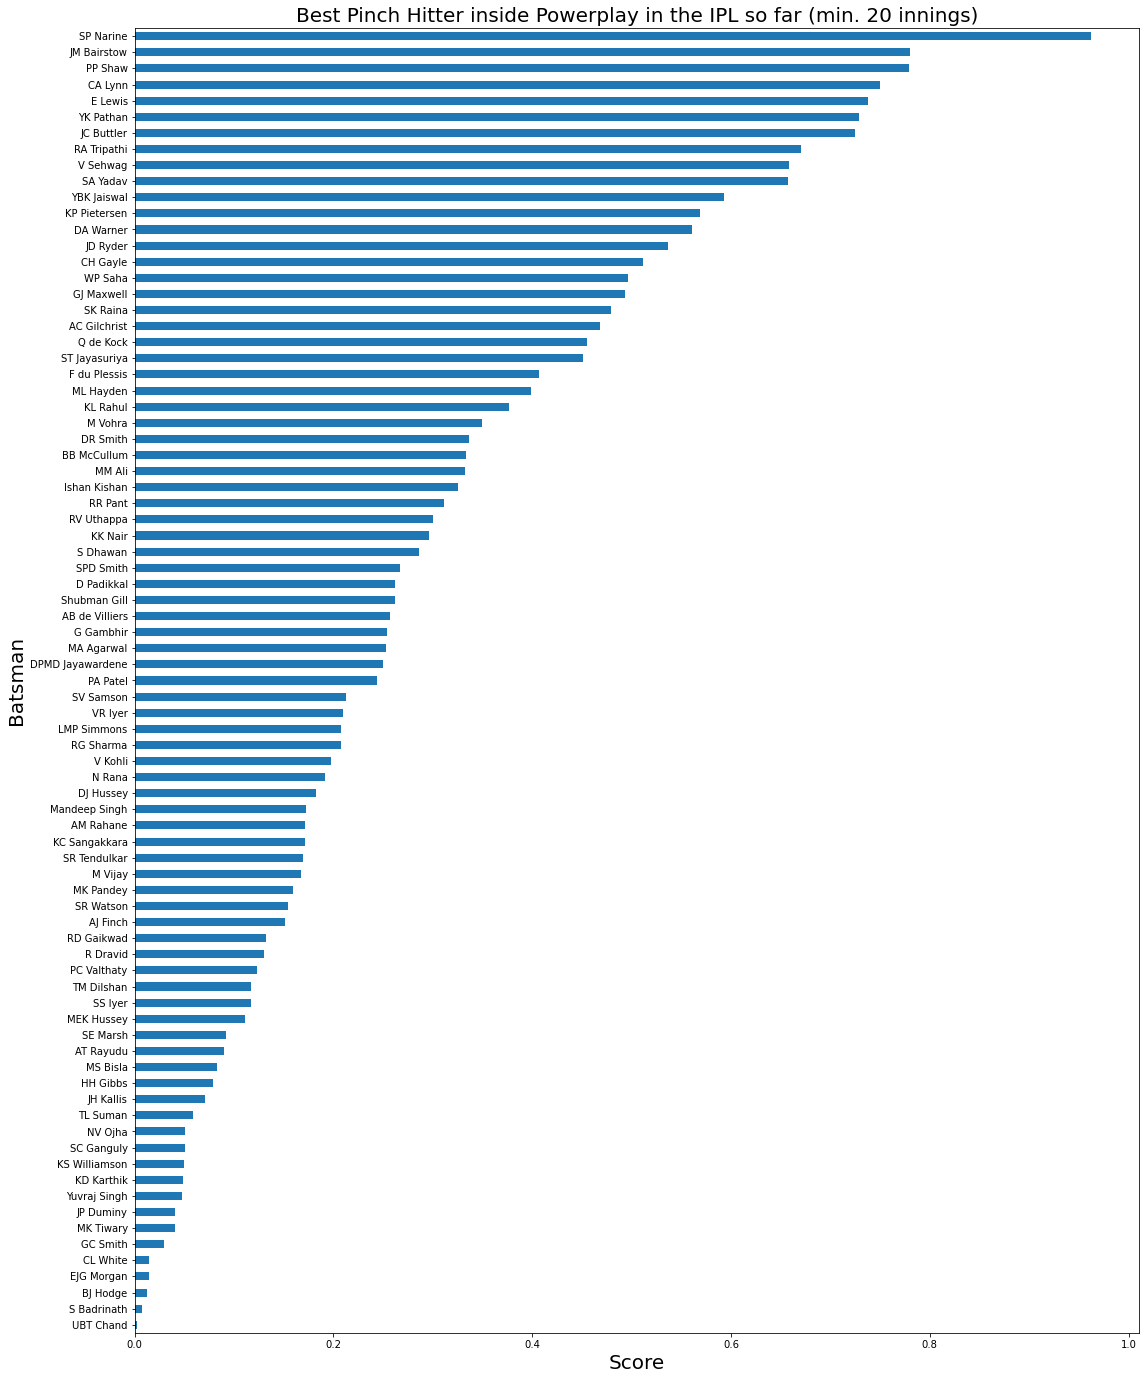

In [43]:
plt.figure(figsize = (18, 24))
pp_df.groupby(['batsman'])['score'].sum().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Best Pinch Hitter inside Powerplay in the IPL so far (min. 20 innings)', fontsize = 20)
plt.xlabel('Score', fontsize = 20)
plt.ylabel('Batsman', fontsize = 20)
plt.show()

# Following are some Top best pinch hitter inside Powerplay in the IPL so far (min. 20 innings)
- Sunil Narine
- JM Bairstow
- PP Shaw
- CA Lynn
- E Lewis
- YK Pathan
- JC Buttler